<a href="https://colab.research.google.com/github/MuditLodha/transformer_fault/blob/main/transformer_fault.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


**Overview:**

- OTI- Oil Temperature Indicator
- WTI- Winding Temperature Indicator
- ATI- Ambient Temperature Indicator
- OLI- Oil Level Indicator
- OTIA- Oil Temperature Indicator Alarm OTIT
- Oil Temperature Indicator Trip
- MOG_A- Magnetic oil gauge indicator

**CurrentVoltage:**

- VL1- Phase Line 1
- VL2- Phase Line 2
- VL3- Phase Line 3

- IL1- Current Line 1
- IL2- Current Line 2
- IL3- Current Line 3

- VL12- Voltage line 1 2
- VL23- Voltage line 2 3
- VL31- Voltage line 3 1

- INUT- Neutral Current

<span class="label label-default" style="background-color:#DC1010; border-radius:12px; font-weight: bold; font-family:Verdana; font-size:28px; color:#FBFAFC; ">Objectives of Notebook</span>

<font color="Blue" size=+1.5><b>1. Dataset exploration using various types of data visualization.</b></font>

<font color="Blue" size=+1.5><b>2. Build various Machine Learning models that can predict the Magnetic oil gauge fault indicator.</b></font>

<span class="label label-default" style="background-color:#DC1010; border-radius:12px; font-weight: bold; font-family:Verdana; font-size:28px; color:#FBFAFC; ">The machine learning models used in this project are:</span>

<div style="font-family: Lucida Calligraphy; line-height:1.5; color: Blue; text-align: justify">
     The <b>models</b> used in this notebook:
    <ol start="1">
        <li> <b>Logistic Regression</b>,</li>
        <li> <b>Support Vector Machine (SVM)</b>,</li>
        <li> <b>K-Nearest Neighbour (KNN)</b>,</li>
        <li> <b>Decision Tree</b>,</li>
        <li> <b>Random Forest</b>,</li>
        <li> <b>Extra Tree Classifier</b>,</li>
        <li> <b><span style="font-size: 8; background-color: #FFDF01;"></span> AdaBoost</b>,and</li>
        <li> <b><span style="font-size: 8; background-color: #FFDF01;"></span> XGB Classifier</b>.</li>
    </ol>
</div>

In [36]:

tf = pd.read_csv("Overview.csv")
display(tf.shape)
tf.head()
tf.info()

(20316, 8)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20316 entries, 0 to 20315
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   DeviceTimeStamp  20316 non-null  object 
 1   OTI              20316 non-null  float64
 2   WTI              20316 non-null  float64
 3   ATI              20316 non-null  float64
 4   OLI              20316 non-null  float64
 5   OTI_A            20316 non-null  float64
 6   OTI_T            20316 non-null  float64
 7   MOG_A            20316 non-null  float64
dtypes: float64(7), object(1)
memory usage: 1.2+ MB


In [37]:
# utc se bas universal time le liya hai
# errors - jo object parseble nahi hai usse nat se bhardeta hai(Not a time)
tf['DeviceTimeStamp'] = pd.to_datetime(tf['DeviceTimeStamp'], errors='coerce', utc=True)

tf = tf.sort_values(by='DeviceTimeStamp')

tf.head()

,DeviceTimeStamp,OTI,WTI,ATI,OLI,OTI_A,OTI_T,MOG_A
0,2019-06-25 13:06:00+00:00,0.0,0.0,0.0,37.0,0.0,0.0,0.0
1,2019-06-25 13:09:00+00:00,0.0,0.0,0.0,37.0,0.0,0.0,0.0
2,2019-06-27 10:49:00+00:00,0.0,0.0,0.0,38.0,0.0,0.0,0.0
3,2019-06-27 10:51:00+00:00,0.0,0.0,0.0,38.0,0.0,0.0,0.0
4,2019-06-27 10:52:00+00:00,0.0,0.0,0.0,39.0,0.0,0.0,0.0


In [38]:
cv = pd.read_csv("CurrentVoltage.csv")
cv = cv.sort_values(by='DeviceTimeStamp')

print(cv.shape)
cv.head()

(19352, 11)


,DeviceTimeStamp,VL1,VL2,VL3,IL1,IL2,IL3,VL12,VL23,VL31,INUT
0,2019-06-25T13:06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2019-06-27T10:49,238.7,238.7,238.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2019-06-27T10:51,238.4,238.5,238.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2019-06-27T10:52,239.9,240.0,240.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2019-06-27T10:52,239.9,240.0,240.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<span style="background-color:red;
             color:white;
             font-size:17px;
             text-align:center;
             border-radius:30px 80px;
             font-weight:bold;
             border:2px solid red;
             padding:0px 20px;">Converting to datetime datatype
</span>

In [39]:

cv['DeviceTimeStamp'] = pd.to_datetime(cv['DeviceTimeStamp'], errors='coerce', utc=True)

cv.sample(10)

,DeviceTimeStamp,VL1,VL2,VL3,IL1,IL2,IL3,VL12,VL23,VL31,INUT
6764,2019-09-15 04:15:00+00:00,238.7,238.8,239.9,49.3,54.9,77.3,413.7,416.0,414.3,24.4
15458,2020-02-09 13:30:00+00:00,246.0,245.2,243.3,56.0,35.9,83.6,425.1,422.3,425.4,40.4
9644,2019-10-27 06:00:00+00:00,249.1,247.1,244.6,38.3,31.6,68.7,429.4,427.1,429.4,34.3
6406,2019-09-11 03:15:00+00:00,240.4,240.5,241.5,78.6,53.3,89.0,414.5,417.4,415.3,35.2
15167,2020-02-06 13:30:00+00:00,247.4,247.3,245.4,96.5,45.6,106.0,428.9,426.3,428.4,55.0
886,2019-06-29 11:16:00+00:00,241.6,241.6,241.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19221,2020-04-12 16:30:00+00:00,247.2,245.8,245.5,56.8,25.4,63.7,427.7,424.5,427.9,35.4
4292,2019-08-16 05:15:00+00:00,240.8,240.5,241.7,46.0,29.7,61.0,416.6,417.3,419.3,26.9
17833,2020-03-28 18:00:00+00:00,243.9,242.7,241.6,66.8,49.4,68.2,421.3,418.9,421.9,18.1
8079,2019-10-06 09:45:00+00:00,231.7,233.9,230.2,78.0,58.1,78.6,402.0,402.7,400.4,19.4


<span style="background-color:red;
             color:white;
             font-size:17px;
             text-align:center;
             border-radius:30px 80px;
             font-weight:bold;
             border:2px solid red;
             padding:0px 20px;">Merge both dataframes along DeviceTimeStamp
</span>

In [40]:

transformer = pd.merge(tf, cv, on='DeviceTimeStamp')
transformer.head(10)

,DeviceTimeStamp,OTI,WTI,ATI,OLI,OTI_A,OTI_T,MOG_A,VL1,VL2,VL3,IL1,IL2,IL3,VL12,VL23,VL31,INUT
0,2019-06-25 13:06:00+00:00,0.0,0.0,0.0,37.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2019-06-27 10:49:00+00:00,0.0,0.0,0.0,38.0,0.0,0.0,0.0,238.7,238.7,238.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2019-06-27 10:51:00+00:00,0.0,0.0,0.0,38.0,0.0,0.0,0.0,238.4,238.5,238.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2019-06-27 10:52:00+00:00,0.0,0.0,0.0,39.0,0.0,0.0,0.0,239.9,240.0,240.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2019-06-27 10:52:00+00:00,0.0,0.0,0.0,39.0,0.0,0.0,0.0,239.9,240.0,240.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2019-06-27 10:52:00+00:00,0.0,0.0,0.0,38.0,0.0,0.0,0.0,239.9,240.0,240.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,2019-06-27 10:52:00+00:00,0.0,0.0,0.0,38.0,0.0,0.0,0.0,239.9,240.0,240.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,2019-06-27 10:53:00+00:00,0.0,0.0,0.0,39.0,0.0,0.0,0.0,241.1,241.2,241.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,2019-06-27 10:54:00+00:00,0.0,0.0,0.0,39.0,0.0,0.0,0.0,240.7,240.8,240.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,2019-06-27 10:56:00+00:00,0.0,0.0,0.0,38.0,0.0,0.0,0.0,240.7,240.8,240.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [41]:
transformer.shape

(20465, 18)

<span class="label label-default" style="background-color:#DC1010; border-radius:12px; font-weight: bold; font-family:Verdana; font-size:28px; color:#FBFAFC; ">Transformer Parameter Visualization</span>

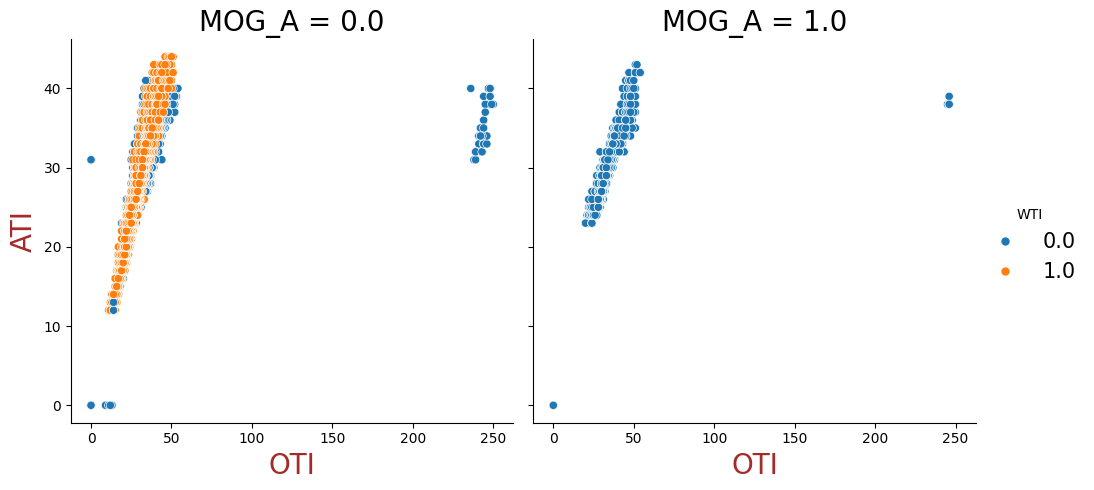

In [42]:
import seaborn as sns
sns.relplot(data=tf, x="OTI", y="ATI", hue="WTI",col="MOG_A");

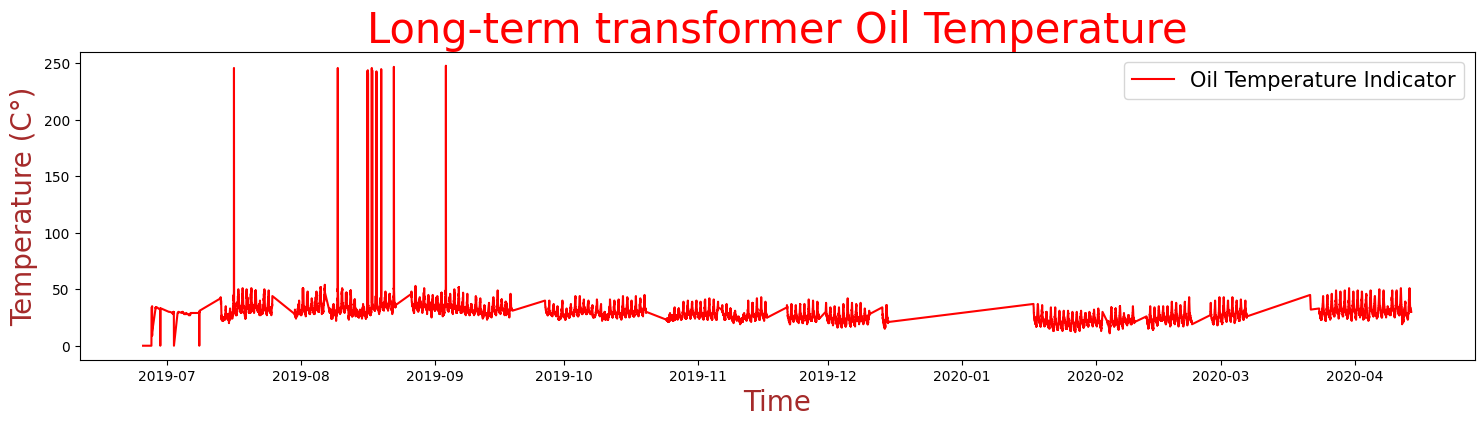

In [43]:

plt.figure(figsize=(18,4))

plt.plot(transformer.DeviceTimeStamp, transformer.OTI, label="Oil Temperature Indicator",color='red')
plt.title("Long-term transformer Oil Temperature",fontsize = 30,color='Red')
plt.legend()
plt.xlabel("Time")
plt.ylabel("Temperature (C°)")
plt.show()

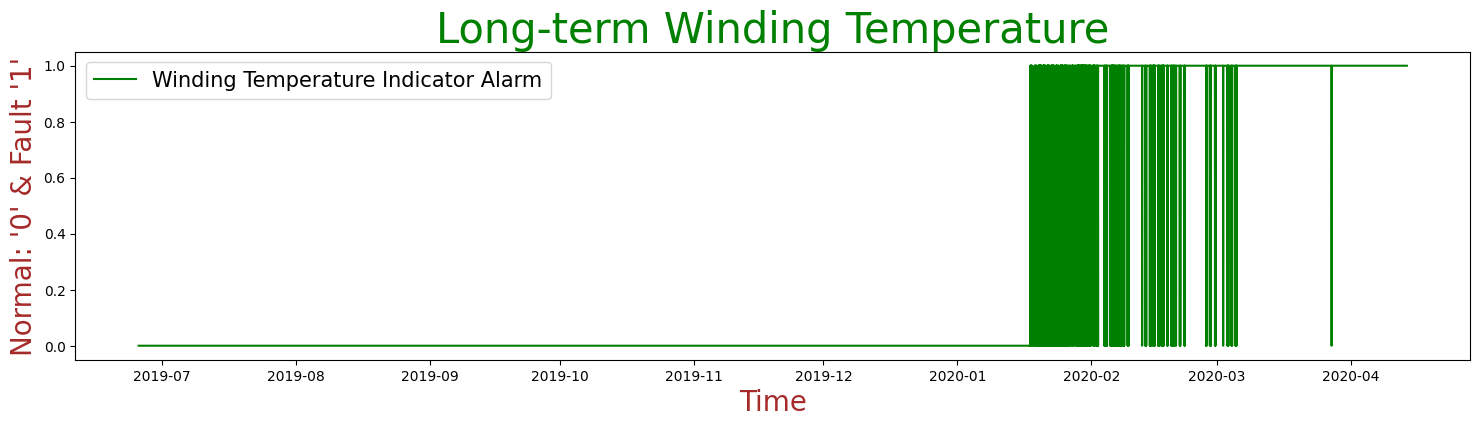

In [44]:

plt.figure(figsize=(18,4))

plt.plot(transformer.DeviceTimeStamp, transformer.WTI, label="Winding Temperature Indicator Alarm",color='green')
plt.title("Long-term Winding Temperature",fontsize = 30,color='Green')
plt.legend()
plt.xlabel("Time")
plt.ylabel("Normal: '0' & Fault '1'")
plt.show()

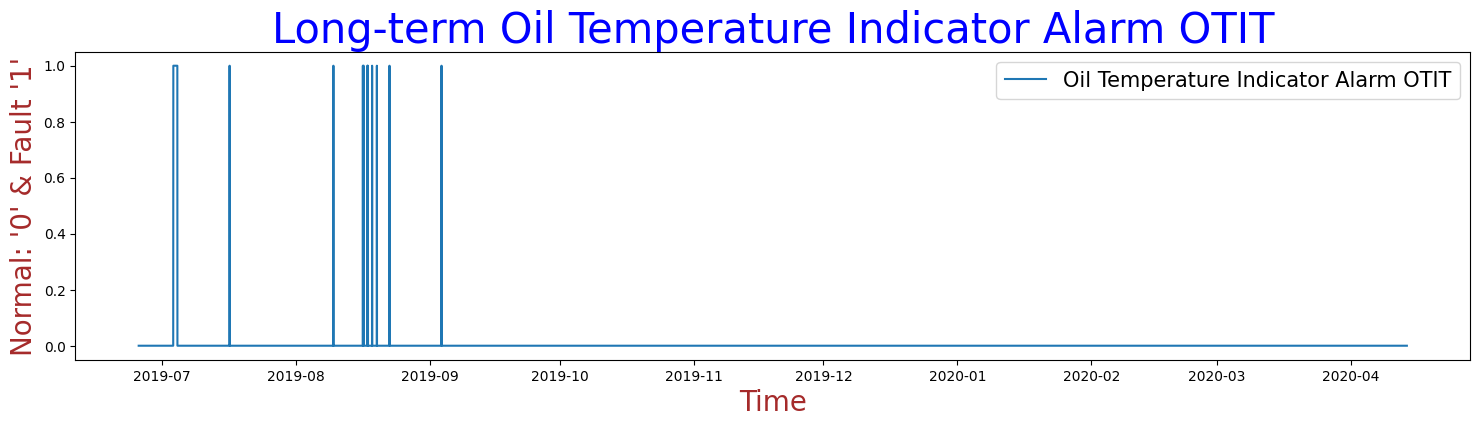

In [45]:


plt.figure(figsize=(18,4))
plt.plot(transformer.DeviceTimeStamp, transformer.OTI_A, label="Oil Temperature Indicator Alarm OTIT")
plt.title("Long-term Oil Temperature Indicator Alarm OTIT",fontsize = 30,color='Blue')
plt.legend()
plt.xlabel("Time")
plt.ylabel("Normal: '0' & Fault '1'")
plt.show()

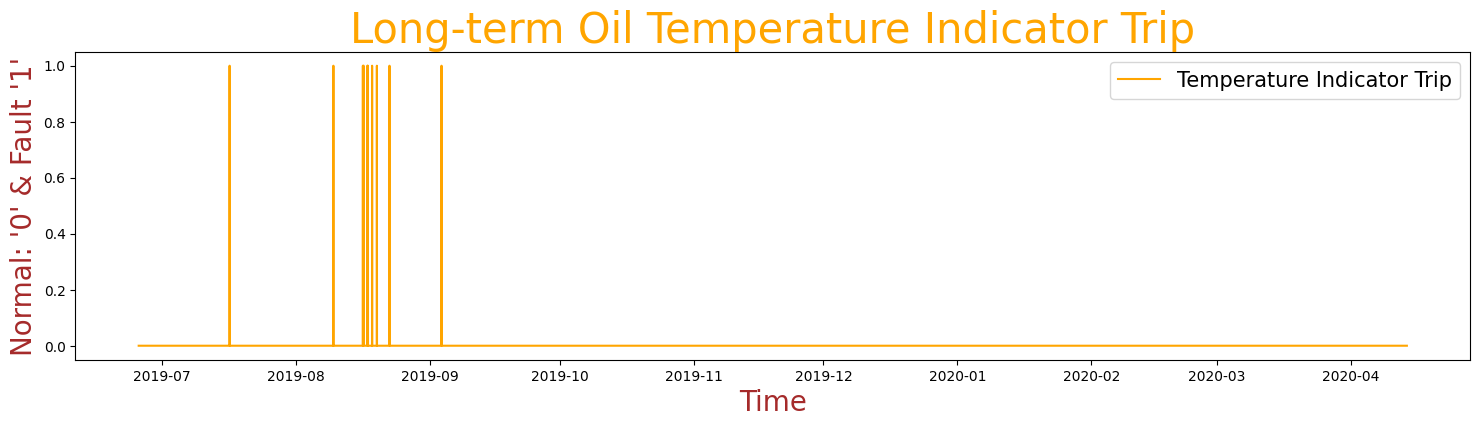

In [46]:
plt.figure(figsize=(18,4))
plt.plot(transformer.DeviceTimeStamp, transformer.OTI_T, label="Temperature Indicator Trip",color='Orange')
plt.title("Long-term Oil Temperature Indicator Trip",fontsize = 30,color='Orange')
plt.legend()
plt.xlabel("Time")
plt.ylabel("Normal: '0' & Fault '1'")
plt.show()

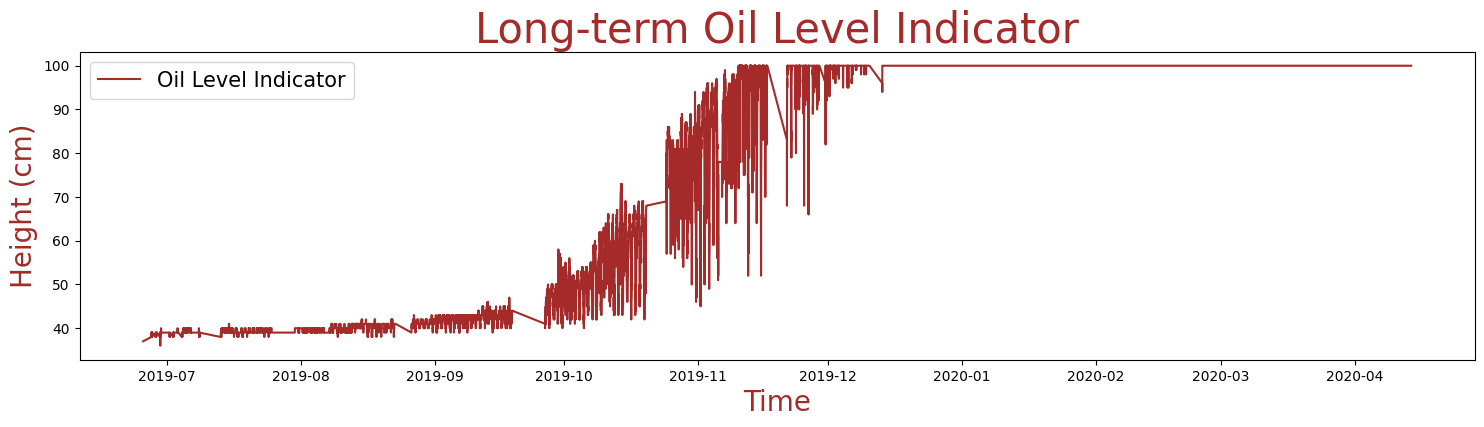

In [47]:
plt.figure(figsize=(18,4))
plt.plot(transformer.DeviceTimeStamp, transformer.OLI, label="Oil Level Indicator",color='Brown')
plt.title("Long-term Oil Level Indicator",fontsize = 30,color='Brown')
plt.legend()
plt.xlabel("Time")
plt.ylabel("Height (cm)")
plt.show()

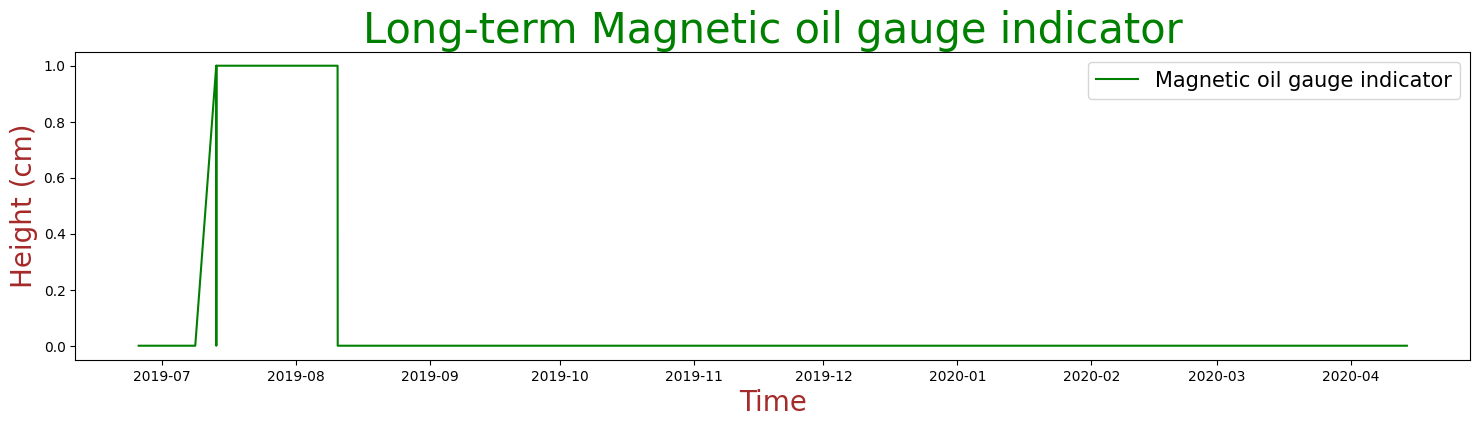

In [48]:
plt.figure(figsize=(18,4))

plt.plot(transformer.DeviceTimeStamp, transformer.MOG_A, label="Magnetic oil gauge indicator",color='green')
plt.title("Long-term Magnetic oil gauge indicator",fontsize = 30,color='green')
plt.legend()
plt.xlabel("Time")
plt.ylabel("Height (cm)")
plt.show()

/tmp/ipython-input-49-72640730.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='OTI_A', data=transformer, palette='RdBu')


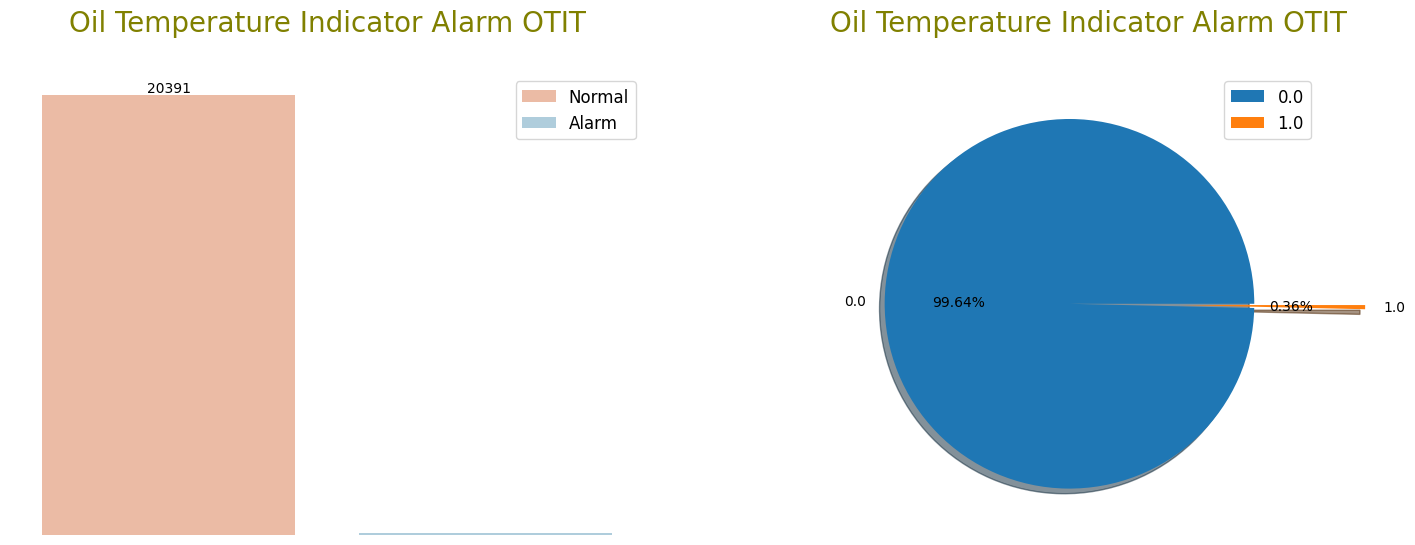

In [49]:
plt.rcParams['legend.fontsize'] = 12
plt.rcParams["axes.labelsize"] = 20

plt.figure(figsize=(18,6))
ax = plt.subplot(1,2,1)
ax = sns.countplot(x='OTI_A', data=transformer, palette='RdBu')
ax.bar_label(ax.containers[0])
plt.title("Oil Temperature Indicator Alarm OTIT", fontsize=20,color='Olive',pad=30)
plt.legend(labels=['Normal','Alarm'])
plt.axis('off');

ax =plt.subplot(1,2,2)
ax=transformer['OTI_A'].value_counts().plot.pie(explode=[0.1, 0.5],autopct='%1.2f%%',shadow=True);
ax.set_title(label = "Oil Temperature Indicator Alarm OTIT", fontsize = 20,color='Olive',pad= 30);
plt.legend()
plt.axis('off');

/tmp/ipython-input-50-92906569.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='OTI_T', data=transformer, palette='rainbow')


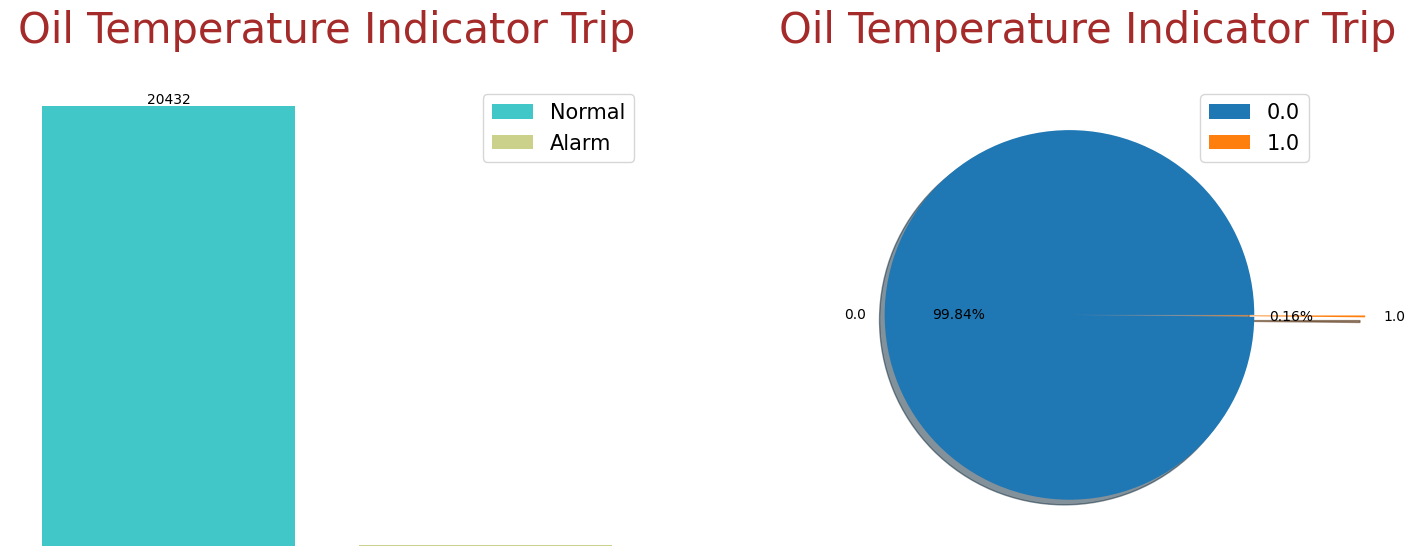

In [50]:
plt.rcParams['legend.fontsize'] = 15
plt.rcParams["axes.labelsize"] = 20
plt.rcParams["axes.labelcolor"] = 'brown'

plt.figure(figsize=(18,6))
ax = plt.subplot(1,2,1)
ax = sns.countplot(x='OTI_T', data=transformer, palette='rainbow')
ax.bar_label(ax.containers[0])
plt.title("Oil Temperature Indicator Trip", fontsize=30,color='Brown',pad=30)
plt.legend(labels=['Normal','Alarm'])
plt.axis('off');

ax =plt.subplot(1,2,2)
ax=transformer['OTI_T'].value_counts().plot.pie(explode=[0.1, 0.5],autopct='%1.2f%%',shadow=True);
ax.set_title(label = "Oil Temperature Indicator Trip", fontsize = 30,color='Brown',pad= 30);
plt.legend()
plt.axis('off');

/tmp/ipython-input-51-376912952.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='MOG_A', data=transformer, palette='rainbow')


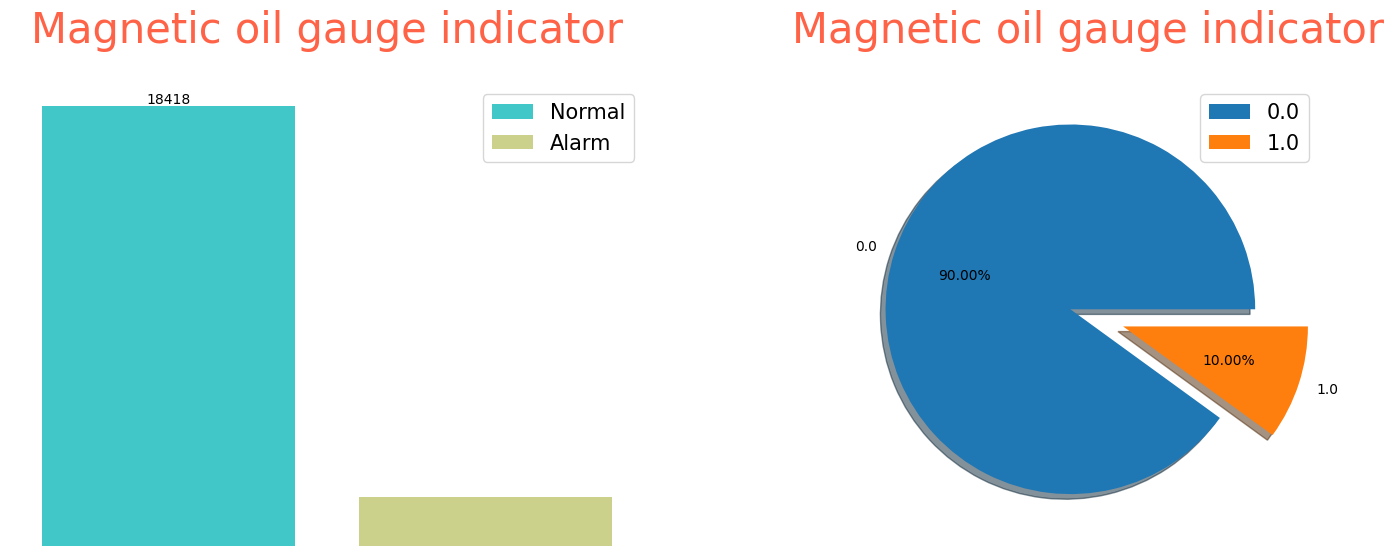

In [51]:
plt.figure(figsize=(18,6))
ax = plt.subplot(1,2,1)
ax = sns.countplot(x='MOG_A', data=transformer, palette='rainbow')
ax.bar_label(ax.containers[0])
plt.title("Magnetic oil gauge indicator", fontsize=30,color='Tomato',pad=30)
plt.legend(labels=['Normal','Alarm'])
plt.axis('off');

ax =plt.subplot(1,2,2)
ax=transformer['MOG_A'].value_counts().plot.pie(explode=[0.1, 0.2],autopct='%1.2f%%',shadow=True);
ax.set_title(label = "Magnetic oil gauge indicator", fontsize = 30,color='Tomato',pad= 30);
plt.legend()
plt.axis('off');

In [52]:
transformer.sample(10)

,DeviceTimeStamp,OTI,WTI,ATI,OLI,OTI_A,OTI_T,MOG_A,VL1,VL2,VL3,IL1,IL2,IL3,VL12,VL23,VL31,INUT
18318,2020-03-06 03:15:00+00:00,25.0,1.0,23.0,100.0,0.0,0.0,0.0,253.9,253.1,252.5,44.8,27.2,51.2,439.0,437.4,440.1,26.5
4100,2019-08-04 06:30:00+00:00,31.0,0.0,28.0,40.0,0.0,0.0,1.0,240.2,239.6,240.7,56.2,46.2,71.1,413.3,413.6,415.6,22.0
17127,2020-02-18 16:45:00+00:00,31.0,1.0,27.0,100.0,0.0,0.0,0.0,245.1,244.4,243.3,95.5,62.4,86.5,424.2,421.9,424.0,29.9
9503,2019-10-11 08:00:00+00:00,28.0,0.0,26.0,58.0,0.0,0.0,0.0,245.1,242.5,242.9,67.9,63.3,69.7,422.0,420.9,422.7,8.4
1708,2019-06-29 14:08:00+00:00,33.0,0.0,33.0,39.0,0.0,0.0,0.0,243.6,243.7,243.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9444,2019-10-10 17:30:00+00:00,25.0,0.0,25.0,61.0,0.0,0.0,0.0,237.9,236.1,234.3,144.0,132.5,190.9,409.6,406.7,410.7,53.1
16751,2020-02-14 19:00:00+00:00,24.0,1.0,22.0,100.0,0.0,0.0,0.0,246.1,244.9,243.8,101.9,98.8,162.7,425.0,422.3,426.3,62.6
18566,2020-03-25 04:45:00+00:00,25.0,1.0,23.0,100.0,0.0,0.0,0.0,253.3,252.5,251.0,44.9,24.0,51.5,438.1,434.9,438.7,24.8
1956,2019-06-29 15:48:00+00:00,33.0,0.0,33.0,39.0,0.0,0.0,0.0,243.6,243.6,243.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12443,2019-11-15 22:01:00+00:00,28.0,0.0,24.0,97.0,0.0,0.0,0.0,247.2,246.3,245.5,76.2,47.7,88.1,428.0,424.8,428.5,35.6


<span class="label label-default" style="background-color:#DC1010; border-radius:12px; font-weight: bold; font-family:Verdana; font-size:28px; color:#FBFAFC; ">Train Test Split</span>

In [53]:
X = transformer.drop(['DeviceTimeStamp','MOG_A'],axis=1)
y = transformer['MOG_A']

In [54]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.20,random_state=21)

<span class="label label-default" style="background-color:#DC1010; border-radius:12px; font-weight: bold; font-family:Verdana; font-size:28px; color:#FBFAFC; ">Normalizing the data</span>

In [55]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

<div style="color:white;background-color:Red;padding:2%;border-radius:150px 150px;font-size:3em;text-align:center">Model Implementation</div>

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:33px;
           font-family:Nexa;
           letter-spacing:0.5px">
        <p style="padding: 15px;
              color:white;">
            <b>1. Logistic Regression</b>
        </p>
</div>

Training Accuracy    : 94.23 %
Model Accuracy Score : 94.26 %
Classification Report:
               precision    recall  f1-score   support

         0.0       0.94      1.00      0.97      3684
         1.0       0.91      0.47      0.62       409

    accuracy                           0.94      4093
   macro avg       0.93      0.73      0.79      4093
weighted avg       0.94      0.94      0.93      4093



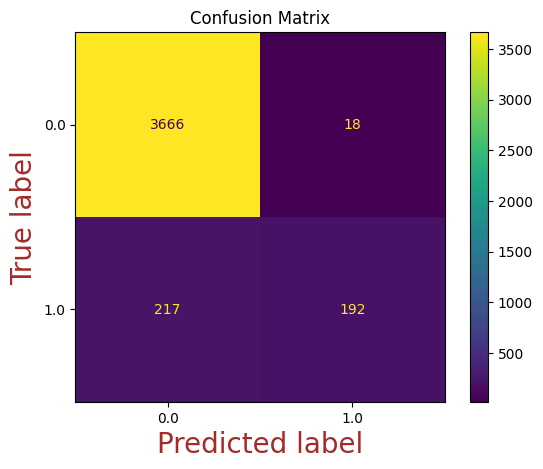

In [56]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt


logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_lr = logreg.predict(X_test)


log_train = round(logreg.score(X_train, y_train) * 100, 2)
log_accuracy = round(accuracy_score(y_test, y_pred_lr) * 100, 2)


print("Training Accuracy    :", log_train, "%")
print("Model Accuracy Score :", log_accuracy, "%")

print("Classification Report:\n", classification_report(y_test, y_pred_lr))


disp = ConfusionMatrixDisplay.from_estimator(logreg, X_test, y_test)
plt.title('Confusion Matrix')
plt.show()


<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:33px;
           font-family:Nexa;
           letter-spacing:0.5px">
        <p style="padding: 15px;
              color:white;">
            <b>2. Support Vector Machines</b>
        </p>
</div>

Training Accuracy    : 95.41 %
Model Accuracy Score : 95.58 %
Classification Report:
               precision    recall  f1-score   support

         0.0       0.96      0.99      0.98      3684
         1.0       0.90      0.63      0.74       409

    accuracy                           0.96      4093
   macro avg       0.93      0.81      0.86      4093
weighted avg       0.95      0.96      0.95      4093



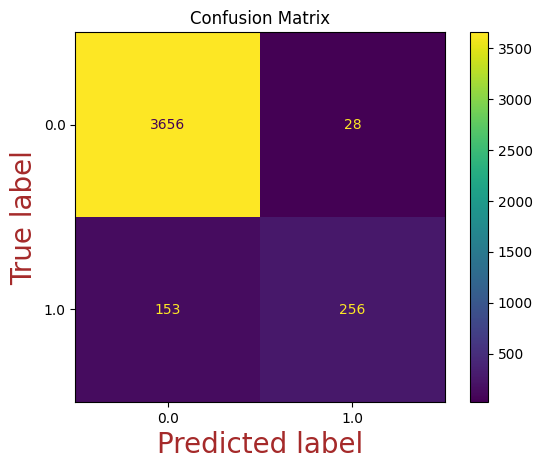

In [57]:
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay


svc = SVC()
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)


svc_train = round(svc.score(X_train, y_train) * 100, 2)
svc_accuracy = round(accuracy_score(y_test, y_pred_svc) * 100, 2)


print("Training Accuracy    :", svc_train, "%")
print("Model Accuracy Score :", svc_accuracy, "%")
print("Classification Report:\n", classification_report(y_test, y_pred_svc))


disp = ConfusionMatrixDisplay.from_estimator(svc, X_test, y_test)
plt.title('Confusion Matrix')
plt.show()


<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:33px;
           font-family:Nexa;
           letter-spacing:0.5px">
        <p style="padding: 15px;
              color:white;">
            <b>3. KNeighborsClassifier</b>
        </p>
</div>

Training Accuracy    : 98.08 %
Model Accuracy Score : 95.48 %
Classification Report:
               precision    recall  f1-score   support

         0.0       0.97      0.98      0.97      3684
         1.0       0.78      0.76      0.77       409

    accuracy                           0.95      4093
   macro avg       0.88      0.87      0.87      4093
weighted avg       0.95      0.95      0.95      4093



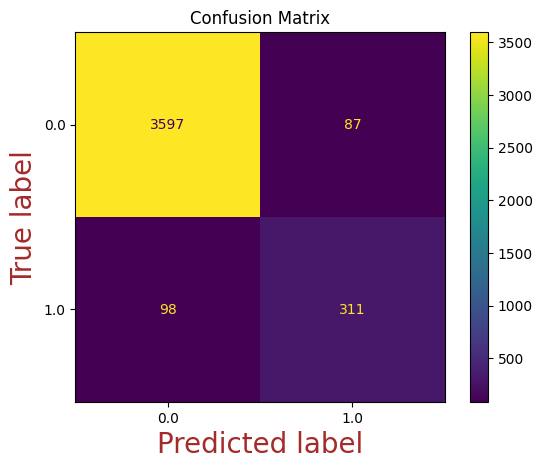

In [58]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay


knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)


knn_train = round(knn.score(X_train, y_train) * 100, 2)
knn_accuracy = round(accuracy_score(y_test, y_pred_knn) * 100, 2)


print("Training Accuracy    :", knn_train, "%")
print("Model Accuracy Score :", knn_accuracy, "%")
print("Classification Report:\n", classification_report(y_test, y_pred_knn))


disp = ConfusionMatrixDisplay.from_estimator(knn, X_test, y_test)
plt.title('Confusion Matrix')
plt.show()


<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:33px;
           font-family:Nexa;
           letter-spacing:0.5px">
        <p style="padding: 15px;
              color:white;">
            <b>4. DecisionTreeClassifier</b>
        </p>
</div>

Training Accuracy    : 100.0 %
Model Accuracy Score : 98.41 %
Classification Report:
               precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      3684
         1.0       0.92      0.92      0.92       409

    accuracy                           0.98      4093
   macro avg       0.95      0.96      0.96      4093
weighted avg       0.98      0.98      0.98      4093



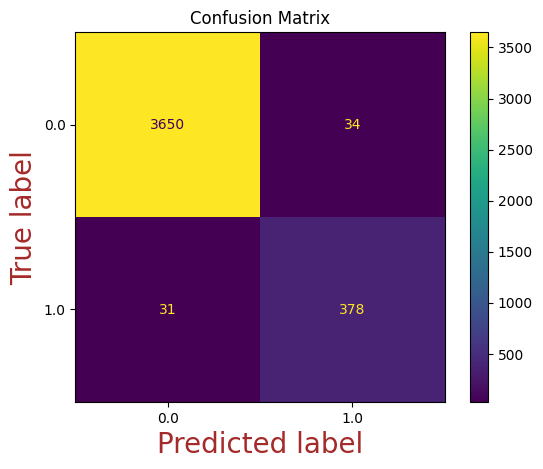

In [59]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay


decision = DecisionTreeClassifier()
decision.fit(X_train, y_train)
y_pred_dec = decision.predict(X_test)


decision_train = round(decision.score(X_train, y_train) * 100, 2)
decision_accuracy = round(accuracy_score(y_test, y_pred_dec) * 100, 2)


print("Training Accuracy    :", decision_train, "%")
print("Model Accuracy Score :", decision_accuracy, "%")
print("Classification Report:\n", classification_report(y_test, y_pred_dec))

disp = ConfusionMatrixDisplay.from_estimator(decision, X_test, y_test)
plt.title('Confusion Matrix')
plt.show()


<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:33px;
           font-family:Nexa;
           letter-spacing:0.5px">
        <p style="padding: 15px;
              color:white;">
            <b>5. RandomForestClassifier</b>
        </p>
</div>

Training Accuracy    : 100.0 %
Model Accuracy Score : 98.92 %
Classification Report:
               precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      3684
         1.0       0.94      0.95      0.95       409

    accuracy                           0.99      4093
   macro avg       0.97      0.97      0.97      4093
weighted avg       0.99      0.99      0.99      4093



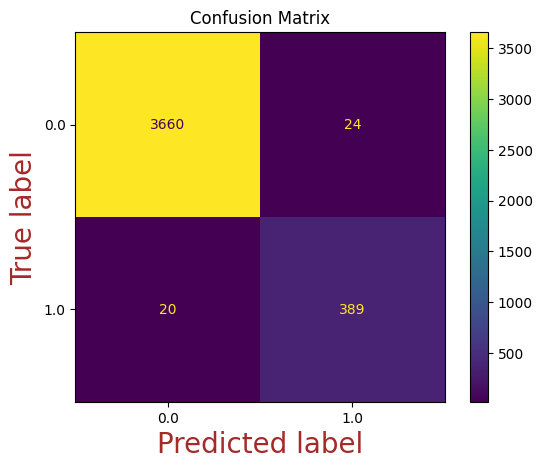

In [60]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay


random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
y_pred_rf = random_forest.predict(X_test)


random_forest_train = round(random_forest.score(X_train, y_train) * 100, 2)
random_forest_accuracy = round(accuracy_score(y_test, y_pred_rf) * 100, 2)


print("Training Accuracy    :", random_forest_train, "%")
print("Model Accuracy Score :", random_forest_accuracy, "%")
print("Classification Report:\n", classification_report(y_test, y_pred_rf))


disp = ConfusionMatrixDisplay.from_estimator(random_forest, X_test, y_test)
plt.title('Confusion Matrix')
plt.show()


<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:33px;
           font-family:Nexa;
           letter-spacing:0.5px">
        <p style="padding: 15px;
              color:white;">
            <b>6. ExtraTreesClassifier</b>
        </p>
</div>

Training Accuracy    : 100.0 %
Model Accuracy Score : 99.02 %
Classification Report:
               precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      3684
         1.0       0.95      0.95      0.95       409

    accuracy                           0.99      4093
   macro avg       0.97      0.97      0.97      4093
weighted avg       0.99      0.99      0.99      4093



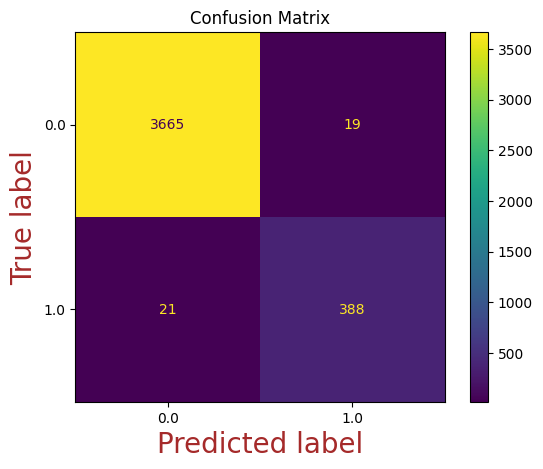

In [61]:
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay

et = ExtraTreesClassifier(n_estimators=100)
et.fit(X_train, y_train)
y_pred_et = et.predict(X_test)


et_train = round(et.score(X_train, y_train) * 100, 2)
et_accuracy = round(accuracy_score(y_test, y_pred_et) * 100, 2)

print("Training Accuracy    :", et_train, "%")
print("Model Accuracy Score :", et_accuracy, "%")
print("Classification Report:\n", classification_report(y_test, y_pred_et))


disp = ConfusionMatrixDisplay.from_estimator(et, X_test, y_test)
plt.title('Confusion Matrix')
plt.show()


<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:33px;
           font-family:Nexa;
           letter-spacing:0.5px">
        <p style="padding: 15px;
              color:white;">
            <b>7. AdaBoostClassifier</b>
        </p>
</div>

Training Accuracy    : 97.7 %
Model Accuracy Score : 97.87 %
Classification Report:
               precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      3684
         1.0       0.88      0.91      0.90       409

    accuracy                           0.98      4093
   macro avg       0.94      0.95      0.94      4093
weighted avg       0.98      0.98      0.98      4093



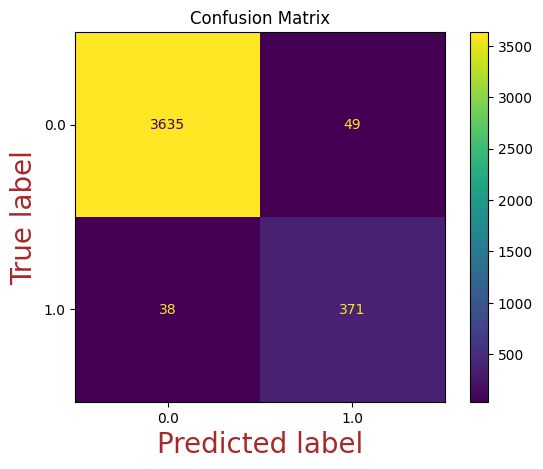

In [62]:
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay

ada = AdaBoostClassifier()
ada.fit(X_train, y_train)
y_pred_ada = ada.predict(X_test)


ada_train = round(ada.score(X_train, y_train) * 100, 2)
ada_accuracy = round(accuracy_score(y_test, y_pred_ada) * 100, 2)


print("Training Accuracy    :", ada_train, "%")
print("Model Accuracy Score :", ada_accuracy, "%")
print("Classification Report:\n", classification_report(y_test, y_pred_ada))

disp = ConfusionMatrixDisplay.from_estimator(ada, X_test, y_test)
plt.title('Confusion Matrix')
plt.show()


<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:33px;
           font-family:Nexa;
           letter-spacing:0.5px">
        <p style="padding: 15px;
              color:white;">
            <b>8. XGB Classifier</b>
        </p>
</div>

Training Accuracy    : 100.0 %
Model Accuracy Score : 98.92 %
Classification Report:
               precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      3684
         1.0       0.94      0.95      0.95       409

    accuracy                           0.99      4093
   macro avg       0.97      0.97      0.97      4093
weighted avg       0.99      0.99      0.99      4093



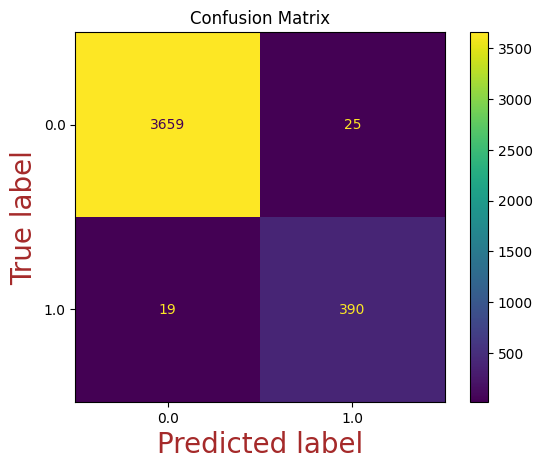

In [63]:
import xgboost as Xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


xgb = Xgb.XGBClassifier()
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)


xgb_train = round(xgb.score(X_train, y_train) * 100, 2)
xgb_accuracy = round(accuracy_score(y_test, y_pred_xgb) * 100, 2)

print("Training Accuracy    :", xgb_train, "%")
print("Model Accuracy Score :", xgb_accuracy, "%")
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))


disp = ConfusionMatrixDisplay.from_estimator(xgb, X_test, y_test)
plt.title('Confusion Matrix')
plt.show()


<div style="display:fill;
            border-radius:15px;
            background-color:white;
            font-size:270%;
            font-family:Vardana;
            letter-spacing:0.5px;
            padding:10px;
            color:Red;
            border-style: solid;
            border-color: red;
            text-align:center;">
<b>Comparing Multiple Models</b>
</div>

In [64]:
models = pd.DataFrame({
    'Model': [
        'Support Vector Machines', 'KNN', 'Logistic Regression',
        'Random Forest', 'Decision Tree','XGBClassifier','ExtraTreesClassifier',
        'AdaBoostClassifier'
    ],
    'Training Accuracy': [
        log_train, svc_train, knn_train, decision_train, random_forest_train,
        xgb_train, et_train, ada_train
    ],
    'Model Accuracy Score': [
        log_accuracy, svc_accuracy, knn_accuracy, decision_accuracy, random_forest_accuracy,
        xgb_accuracy, et_accuracy, ada_accuracy
    ]
})

In [65]:
import pandas as pd

pd.set_option('display.precision', 2)

models.sort_values(by='Model Accuracy Score', ascending=False).style.background_gradient(
        cmap='coolwarm').set_properties(**{
            'font-family': 'Lucida Calligraphy',
            'color': 'lightgreen',
            'font-size': '15px'
        })


,Model,Training Accuracy,Model Accuracy Score
6,ExtraTreesClassifier,100.000000,99.020000
4,Decision Tree,100.000000,98.920000
5,XGBClassifier,100.000000,98.920000
3,Random Forest,100.000000,98.410000
7,AdaBoostClassifier,97.700000,97.870000
1,KNN,95.410000,95.580000
2,Logistic Regression,98.080000,95.480000
0,Support Vector Machines,94.230000,94.260000


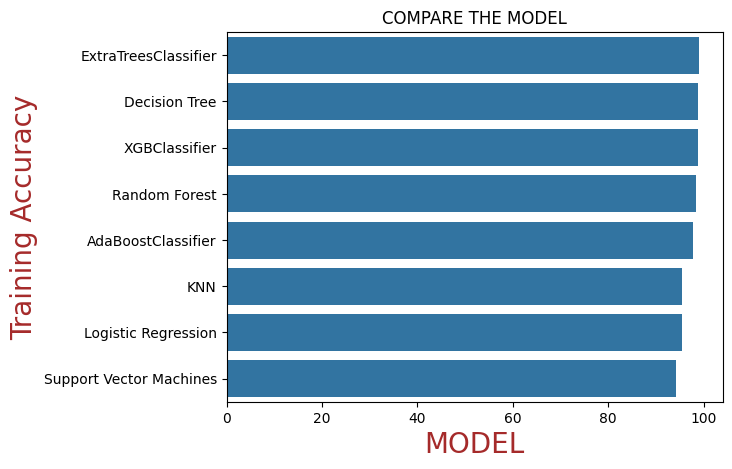

In [66]:
models=models.sort_values(by='Model Accuracy Score',ascending=False)[:8]

sns.barplot(y= 'Model', x= 'Model Accuracy Score', data= models)
plt.title('COMPARE THE MODEL')
plt.xlabel('MODEL')
plt.ylabel('Training Accuracy');

In [67]:
# Xn = scaler.transform(X)
prediction = et.predict(X_test)
print(prediction)

c0 = 0
c1 = 0
for i in prediction:
    if i == 0:
        c0 += 1
    else:
        c1 += 1
print(c0)
print(c1)
# prediction.shape
# prediction[2734]

[0. 0. 1. ... 1. 0. 0.]
3686
407


In [68]:
cross_checking = pd.DataFrame({'Actual' : y_test , 'Predicted' : prediction})
cross_checking.sample(50).style.background_gradient(
        cmap='coolwarm').set_properties(**{
            'font-family': 'Lucida Calligraphy',
            'color': 'LigntGreen',
            'font-size': '15px'
        })

,Actual,Predicted
20084,0.000000,0.000000
4448,1.000000,1.000000
18026,0.000000,0.000000
13164,0.000000,0.000000
13234,0.000000,0.000000
2707,1.000000,1.000000
7823,0.000000,0.000000
3694,1.000000,1.000000
18405,0.000000,0.000000
16124,0.000000,0.000000
